**Sentiment Analysis of IMDB Movie Reviews**

**Problem Statement:**

In this task, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

**Import necessary libraries**

In [ ]:
!pip install wordcloud

In [3]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4-HxS92aK1u1SKHGCn_MEuOf7_uhzcJmo2Vq_nNGkUVq1mEz1flFg
Mounted at /content/drive


**Import the dataset**

In [126]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WIH2001 Data Analytics/IMDB Dataset.csv')
print(imdb_data.shape)
print(imdb_data.head(3))
print(imdb_data.dtypes)

(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
review       object
sentiment    object
dtype: object


**Exploratory data analysis**

In [127]:
#To check whether the dataset has any missing values
print(imdb_data.isnull().sum())
#Summary of the dataset
imdb_data.describe()

review       0
sentiment    0
dtype: int64


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


**Sentiment count**

In [128]:
#sentiment count
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

We can see that the dataset is balanced. We can use a normal classification algorithm for this problem. 

**Plot the graph of review length for positive and negative sentiments**

Maximum length among all reviews: 2470


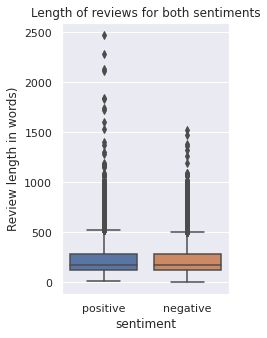

In [129]:
#Split each word for each review and calculate the length of each review in words
review_split = imdb_data['review'].apply(str.split)
review_length = []
for i in range(len(review_split)):
    review_length.append(len(review_split[i]))
imdb_with_reviews_len = pd.concat([imdb_data,pd.Series(review_length,name="review_length")], axis=1)
print('Maximum length among all reviews:', max(review_length))
#Seaborn boxplot to show the comparison of length of reviews for positive and negative sentiments
plt.figure(figsize=(3,5))
sns.boxplot(data=imdb_with_reviews_len, x="sentiment", y="review_length")
plt.title('Length of reviews for both sentiments')
plt.ylabel('Review length in words)')
plt.show()

**Removing html strips and noise text**

In [130]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# #Removing the square brackets
# def remove_between_square_brackets(text):
#     return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    # text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [131]:
imdb_data['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

**Removing special characters**

In [132]:
#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [133]:
#imdb_data['review']

**Removing stopwords**

In [134]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
import nltk
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
#set stopwords to english
stop=stopwords.words('english')
print(stop)
new_stop = stop[:116]
print(new_stop)
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in new_stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [174]:
print(stop)
print(new_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Text stemming
**

In [135]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Lemmatizing the text
def simple_lemmatizer(text):
    lm=WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word) for word in text.split()])
    return text

In [136]:
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)
imdb_data['review']=imdb_data['review'].apply(simple_lemmatizer)
imdb_data['review']

0        One reviewer mentioned watching just 1 Oz epis...
1        wonderful little production filming technique ...
2        thought wonderful way spend time too hot summe...
3        Basically there family little boy Jake think t...
4        Petter Matteis Love Time Money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary school nu...
49998    Im going disagree previous comment side Maltin...
49999    No one expects Star Trek movie high art fan ex...
Name: review, Length: 50000, dtype: object

**Spliting the training dataset**

In [137]:
#split the dataset
#stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
#For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones,
#stratify=y will make sure that your random split has 25% of 0's and 75% of 1's
train_reviews,test_reviews,train_sentiments,test_sentiments = train_test_split(imdb_data.review,imdb_data.sentiment,test_size=0.2,random_state=69,stratify=imdb_data.sentiment)
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [138]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.01, ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 1811)
Tfidf_test: (10000, 1811)


In [155]:
print('Tfidf_train:',tv_train_reviews[0])
print('Tfidf_test:',tv_test_reviews[0])

Tfidf_train:   (0, 1267)	0.17240977615286182
  (0, 990)	0.18630723639222735
  (0, 1080)	0.05772755073446027
  (0, 467)	0.15535361522693683
  (0, 918)	0.10195490174235572
  (0, 1136)	0.16798179444517175
  (0, 971)	0.17788582339443704
  (0, 1542)	0.1877794889216892
  (0, 1459)	0.15206429354298504
  (0, 495)	0.13839407335904935
  (0, 1524)	0.20601101642570435
  (0, 450)	0.1421349250244901
  (0, 660)	0.07521478438777823
  (0, 1060)	0.09919324583324232
  (0, 1420)	0.12622674413485666
  (0, 248)	0.1412337033741296
  (0, 1594)	0.13862499681193594
  (0, 316)	0.09361793253792462
  (0, 1689)	0.17611765346263275
  (0, 704)	0.3136489256967516
  (0, 538)	0.20481398808367166
  (0, 1195)	0.11478262154021142
  (0, 1718)	0.10967130887079503
  (0, 626)	0.13206247571277088
  (0, 116)	0.18679164090415312
  (0, 1630)	0.1996805001822339
  (0, 1232)	0.1370504758903613
  (0, 1070)	0.08152936976946848
  (0, 741)	0.12227928572518958
  (0, 853)	0.13847541469164645
  (0, 1572)	0.08621254130531777
  (0, 1266)	0.12

**Modelling the dataset**

**Logistic regression**

In [175]:
#Model 1
lr=LogisticRegression(C=5, random_state=42)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

#Model 2
lr1=LogisticRegression(C=100, random_state=42)
#Fitting the model for tfidf features
lr1_tfidf=lr1.fit(tv_train_reviews,train_sentiments)
print(lr1_tfidf)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Prediction on test dataset**

In [176]:
#Model 1
#Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)


#Model 2
#Predicting the model for tfidf features
lr1_tfidf_predict=lr1.predict(tv_test_reviews)
print(lr1_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'negative']
['negative' 'positive' 'negative' ... 'positive' 'positive' 'negative']


**Model performance on test data**

In [177]:
#Model 1
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

#Model 2
#Accuracy score for tfidf features
lr1_tfidf_score=accuracy_score(test_sentiments,lr1_tfidf_predict)
print("lr1_tfidf_score :",lr1_tfidf_score)

lr_tfidf_score : 0.8767
lr1_tfidf_score : 0.8749


**Print the classification report**

In [178]:
#Model 1
#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)


#Model 2
#Classification report for tfidf features
lr1_tfidf_report=classification_report(test_sentiments,lr1_tfidf_predict,target_names=['Positive','Negative'])
print(lr1_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.87      0.88      5000
    Negative       0.87      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.87      0.87      5000
    Negative       0.87      0.88      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



**Confusion matrix**

In [179]:
#Model 1
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=['positive','negative'])
print(cm_tfidf)


#Model 2
#confusion matrix for tfidf features
cm1_tfidf=confusion_matrix(test_sentiments,lr1_tfidf_predict,labels=['positive','negative'])
print(cm1_tfidf)

[[4399  601]
 [ 632 4368]]
[[4378  622]
 [ 629 4371]]


**Find the best hyperparameter combination for logistic regression model**

In [180]:
from sklearn.model_selection import RandomizedSearchCV
# Setup the hyperparameter grid
c_space = np.linspace(-5, 8, 15)
max_iter = np.linspace(100, 500, 10)
param_grid = {'C': c_space, 'max_iter': max_iter}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(tv_train_reviews, train_sentiments)
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'max_iter': 100.0, 'C': 1.5}
Best score is 0.8772


In [189]:
# Test on testing data for the best parameter of logistic regression
print('Test score for best parameter for logistic regression model: ', logreg_cv.score(tv_test_reviews, test_sentiments))

Test score for best parameter for logistic regression model:  0.8771


**Multinomial Naive Bayes**

In [182]:
#Model 1 - smaller alpha value
#training the model
mnb=MultinomialNB(alpha=0.2)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

#Model 2 - greater alpha value
mnb1=MultinomialNB(alpha=100)
#fitting the svm for tfidf features
mnb1_tfidf=mnb1.fit(tv_train_reviews,train_sentiments)
print(mnb1_tfidf)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)
MultinomialNB(alpha=100, class_prior=None, fit_prior=True)


**Prediction on test dataset**

In [183]:
#Predicting the model for tfidf features
#Model 1
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

#Model 2
mnb1_tfidf_predict=mnb1.predict(tv_test_reviews)
print(mnb1_tfidf_predict)

['positive' 'positive' 'negative' ... 'positive' 'positive' 'negative']
['positive' 'positive' 'negative' ... 'positive' 'positive' 'negative']


**Model performance on test data**

In [184]:
#Accuracy score for tfidf features
#Model 1
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

#Model 2
mnb1_tfidf_score=accuracy_score(test_sentiments,mnb1_tfidf_predict)
print("mnb1_tfidf_score :",mnb1_tfidf_score)

mnb_tfidf_score : 0.8492
mnb1_tfidf_score : 0.8438


**Print the classification report**

In [185]:
#Classification report for tfidf features
#Model 1
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

#Model 2
mnb1_tfidf_report=classification_report(test_sentiments,mnb1_tfidf_predict,target_names=['Positive','Negative'])
print(mnb1_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.86      0.84      0.85      5000
    Negative       0.84      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.84      0.85      0.84      5000
    Negative       0.85      0.84      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



**Plot the confusion matrix**

In [186]:
#confusion matrix for tfidf features
#Model 1
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=['positive','negative'])
print(cm_tfidf)

#Model 2
#confusion matrix for tfidf features
cm1_tfidf=confusion_matrix(test_sentiments,mnb1_tfidf_predict,labels=['positive','negative'])
print(cm1_tfidf)

[[4310  690]
 [ 818 4182]]
[[4187  813]
 [ 749 4251]]


Find the best hyperparameter for Multinomial Naive Bayes

In [187]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
param_grid = {'alpha':[0,0.001,0.01,0.1,0.5,0.8,1,1.5,2,2.5,3,3.5,5]}
# Instantiate a logistic regression classifier: logreg
mnb_bow = MultinomialNB()
# Instantiate the GridSearchCV object: logreg_cv
mnb_cv = GridSearchCV(mnb_bow, param_grid, cv=5)
# Fit it to the data
mnb_cv.fit(tv_train_reviews, train_sentiments)
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(mnb_cv.best_params_))
print("Best score is {}".format(mnb_cv.best_score_))

Tuned Logistic Regression Parameters: {'alpha': 0.1}
Best score is 0.8483750000000001


In [190]:
# Test on testing data for the best parameter of multinomial naive bayes algorithm
print('Test score for best parameter for logistic regression model: ', mnb_cv.score(tv_test_reviews, test_sentiments))

Test score for best parameter for logistic regression model:  0.8491


**Let us see positive and negative words by using WordCloud.**

**Word cloud for positive review words**

<function matplotlib.pyplot.show>

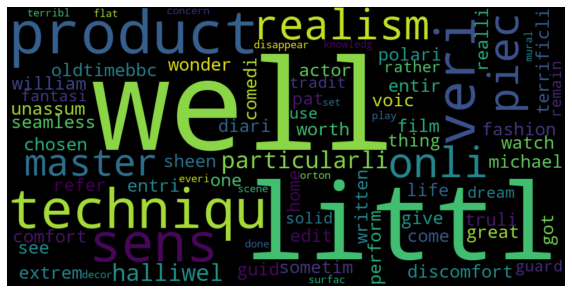

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.axis('off')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show>

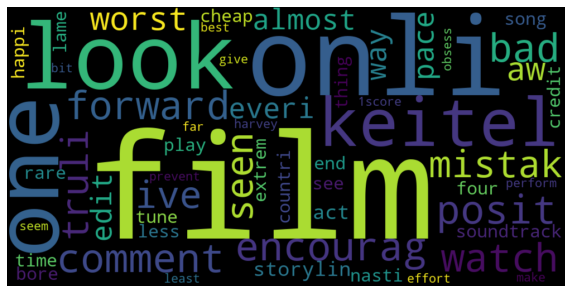

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.axis('off')
plt.show